In [41]:
# NAME: MELCHIZEDEK ACKAH-BLAY
# START DATE: 05-29-2024
# PERSONAL LINEAR REGRESSION MODEL PROJECT

In [42]:
# IMPORTING MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# IMPORTING DATASET
cars = pd.read_csv(r'/Users/melki/Desktop/Car_sales.csv')
cars.head(4)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


In [44]:
# RENAMING COLUMN
cars.rename(columns = {'__year_resale_value':'Resale_value'}, inplace = True)

In [45]:
# CHECKING FOR NULL VALUES
cars.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
Resale_value          36
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

In [46]:
# 'FIXING' NULL COLUMNS

In [47]:
print(cars['Resale_value'].min())
print(cars['Resale_value'].max())
cars['Resale_value'].fillna(cars['Resale_value'].mean(), inplace = True)

5.16
67.55


In [48]:
print(cars['Price_in_thousands'].min())
print(cars['Price_in_thousands'].max())
cars['Price_in_thousands'].fillna(cars['Price_in_thousands'].mean(), inplace = True)

9.235
85.5


In [49]:
cars['Engine_size'].fillna(cars['Engine_size'].mean(), inplace = True)
cars['Horsepower'].fillna(cars['Horsepower'].mean(), inplace = True)
cars['Wheelbase'].fillna(cars['Wheelbase'].mean(), inplace = True)
cars['Width'].fillna(cars['Width'].mean(), inplace = True)
cars['Length'].fillna(cars['Length'].mean(), inplace = True)
cars['Curb_weight'].fillna(cars['Curb_weight'].mean(), inplace = True)
cars['Fuel_capacity'].fillna(cars['Fuel_capacity'].mean(), inplace = True)
cars['Fuel_efficiency'].fillna(cars['Fuel_efficiency'].mean(), inplace = True)

In [50]:
cars.drop(columns=['Power_perf_factor', 'Latest_Launch'], inplace=True)


In [18]:
# LINEAR REGRESSION SCENARIO 1: predicting 'sales in thousands' using 'price in thousands, engine size, horsepower, fuel efficiency and resale value

In [54]:
# lineplot visualizations to compare some of the independent variables (x) to the dependent (y)

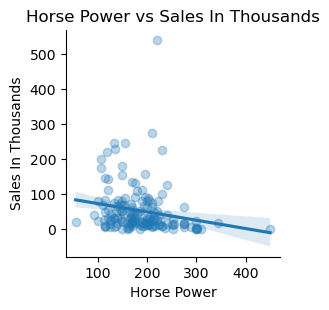

In [66]:
sns.lmplot(x = 'Horsepower', y = 'Sales_in_thousands', data = cars, scatter_kws = {'alpha':0.3}, height = 3)
plt.title('Horse Power vs Sales In Thousands')
plt.xlabel('Horse Power')
plt.ylabel('Sales In Thousands')
plt.show()

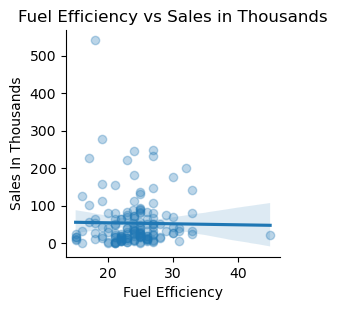

In [67]:
sns.lmplot( x = 'Fuel_efficiency', y = 'Sales_in_thousands', data = cars, scatter_kws = {'alpha':0.3}, height = 3)
plt.title('Fuel Efficiency vs Sales in Thousands')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Sales In Thousands')
plt.show()

In [68]:
from sklearn import model_selection

In [69]:
trainer = model_selection.train_test_split

In [71]:
# splitting the data

In [73]:
X = cars[['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_capacity', 'Resale_value']]
y = cars['Sales_in_thousands']

In [75]:
X_train, X_test, y_train, y_test = trainer(X, y, test_size = 0.3, random_state = 777)

In [78]:
# viewing the X_train data
X_train

,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Resale_value
117,43.000,3.5,253.0,12.0,18.072975
49,17.885,3.0,155.0,16.0,10.055000
128,26.100,2.0,185.0,16.9,18.072975
81,17.357,2.4,145.0,16.3,10.595000
111,36.229,4.0,250.0,18.5,19.890000
...,...,...,...,...,...
71,37.805,3.0,225.0,19.8,32.075000
87,16.540,2.0,125.0,16.0,13.890000
59,20.550,2.0,146.0,15.3,17.710000
47,21.560,3.8,190.0,15.7,12.760000


In [79]:
from sklearn import linear_model

In [81]:
# initializing linear regression model
lm1 = linear_model.LinearRegression()

In [82]:
# training linear regression model
lm1.fit(X_train, y_train)

LinearRegression()

In [83]:
# finding the intercept(s)
lm1.intercept_

47.082892917086575

In [84]:
# finding the R-Squared
lm1.score(X_train, y_train)

0.21989186431449115

In [85]:
print('\n\n\nThe R-Squared suggests that about 21.99% of the variance in sales can be attributed to our dependent variables\n\n\n')




The R-Squared suggests that about 21.99% of the variance in sales can be attributed to our dependent variables





In [86]:
# finding model coefficients
cdf = pd.DataFrame(lm1.coef_, X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Price_in_thousands,-1.911028
Engine_size,35.665597
Horsepower,-0.511818
Fuel_capacity,2.747225
Resale_value,-0.319540


In [87]:
print('\n\n\nFrom our coefficients data frame, it appears Engine Size is the most attributed to sales followed by Fuel Capacity. The least attribute variable is the price of the car\n\n\n')




From our coefficients data frame, it appears Engine Size is the most attributed to sales followed by Fuel Capacity. The least attribute variable is the price of the car





In [90]:
# making predictions
predictions = lm1.predict(X_test)
predictions

array([ -12.97572199,   60.97571769,  -25.86470466,   37.54200839,
         57.87309581,   53.86715457,   54.81610765,   42.27738886,
        108.16778457,   74.28834236,   56.4265573 ,   42.80800788,
         80.75920052,   68.63098908,   55.06878942,   76.1436276 ,
         63.59777755,   53.69423447,   56.53248623,   44.0977975 ,
         30.13499322,   63.55430783,   -4.56470454,   32.68208505,
         70.7452951 ,   69.62047335,   87.57607398,   51.80948337,
         91.10322604,   49.64760702,   68.20794486,   60.94895755,
         42.87544042,   51.41230684,  -93.58982014,   55.11291287,
        144.2529487 ,   81.04724201,   35.05767225,  -27.62158245,
        144.7346957 , -103.35119528,   61.79823067,   25.86979089,
         23.00056531,   73.61906607,   16.82594493,  -33.57830879])

Text(0, 0.5, 'Actual Sales Values')

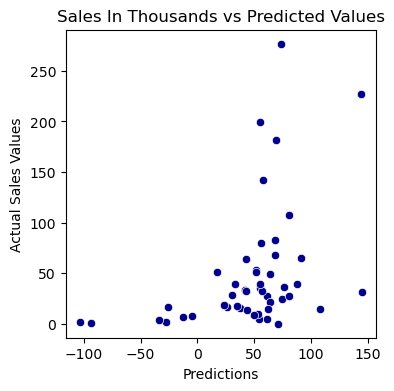

In [99]:
# creating a scatterplot to find the relationship between predictions and the actual data (y_test)
plt.figure(figsize=(4,4))
sns.scatterplot(x = predictions, y = y_test, color = 'darkblue')
plt.title('Sales In Thousands vs Predicted Values')
plt.xlabel('Predictions')
plt.ylabel('Actual Sales Values')

In [100]:
from sklearn import metrics
import math

In [101]:
mae = metrics.mean_absolute_error
mse = metrics.mean_squared_error

In [102]:
# finding possible errors 

In [105]:
print('The mean absolute error is ',mae(y_test, predictions))
print('The mean squared error is ',mse(y_test, predictions))
print('The root mean squared error is ', math.sqrt(mse(y_test, predictions)))

The mean absolute error is  43.40353836903316
The mean squared error is  3559.6661756522412
The root mean squared error is  59.66293804073213


In [106]:
# finding residuals

In [108]:
# residuals = actual value - predictions
residuals = y_test - predictions

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


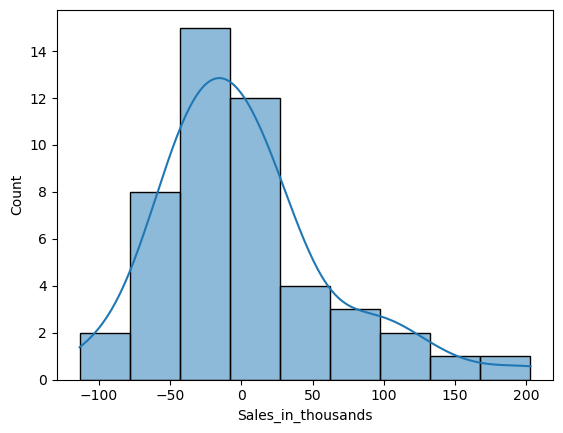

In [111]:
# plotting residuals to determine in they are normally distributed
sns.histplot(residuals, kde = True)
plt.show()

In [114]:
print('\n\n\nThe residuals are slighly right skewed but not to an extreme length\n\n\n')




The residuals are slighly right skewed but not to an extreme length





In [115]:
# creating a QQ plot for the residuals

In [116]:
import pylab
import scipy.stats as stats

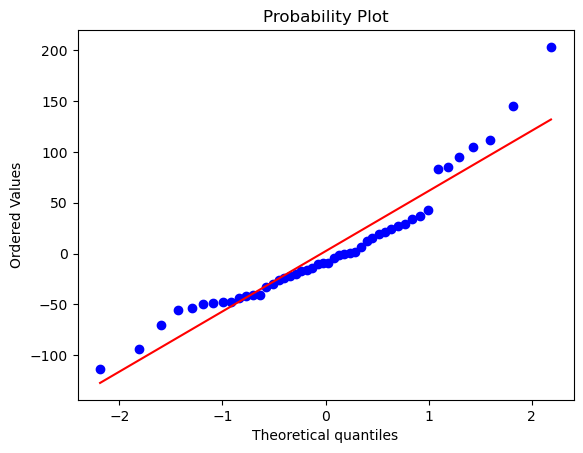

In [117]:
stats.probplot(residuals, dist = 'norm', plot = pylab)
pylab.show()

In [123]:
print('\n\n\nThe overall pattern suggests that the data may be approximately normally distributed but with some deviations, particularly in the tails of the distribution    (extreme values). The points in the tails tend to deviate more from the reference line, indicating that the data may have slightly heavier tails than the normal distribution\n\n\n')





The overall pattern suggests that the data may be approximately normally distributed but with some deviations, particularly in the tails of the distribution    (extreme values). The points in the tails tend to deviate more from the reference line, indicating that the data may have slightly heavier tails than the normal distribution





In [125]:
# LINEAR REGRESSION SCENARIO 2: predicting car prices based on engine size, horsepower, fuel efficiency, curb weight, and resale value

In [126]:
# using a line plot to compare some of the independent variables to the dependent variable (price_in_thousands)

Text(33.51562500000001, 0.5, 'Price In Thousands')

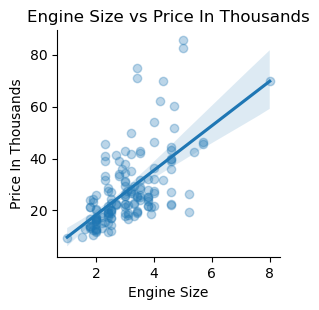

In [129]:
sns.lmplot(x = 'Engine_size', y = 'Price_in_thousands', data = cars, scatter_kws = {'alpha':0.3}, height = 3)
plt.title('Engine Size vs Price In Thousands')
plt.xlabel('Engine Size')
plt.ylabel('Price In Thousands')

Text(33.51562500000001, 0.5, 'Price In Thousands')

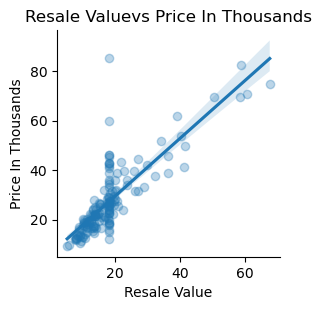

In [133]:
sns.lmplot(x = 'Resale_value', y = 'Price_in_thousands', data = cars, scatter_kws = {'alpha':0.3}, height = 3)
plt.title('Resale Valuevs Price In Thousands')
plt.xlabel('Resale Value')
plt.ylabel('Price In Thousands')

In [134]:
from sklearn import model_selection

In [135]:
trainer = model_selection.train_test_split

In [136]:
# split the data into X and y
X = cars[['Engine_size', 'Horsepower', 'Fuel_capacity', 'Curb_weight', 'Resale_value']]
y = cars['Price_in_thousands']

In [137]:
X_train, X_test, y_train, y_test = trainer(X, y, test_size = 0.3, random_state = 888)

In [138]:
# viewing the X_train
X_train

,Engine_size,Horsepower,Fuel_capacity,Curb_weight,Resale_value
61,3.5,210.0,20.0,4.288,19.490000
104,3.3,170.0,20.0,3.991,15.380000
57,1.6,106.0,11.9,2.339,9.850000
116,2.4,150.0,20.0,3.528,12.025000
84,3.5,200.0,24.3,4.520,19.125000
...,...,...,...,...,...
46,2.0,110.0,12.7,2.468,7.425000
103,3.0,222.0,18.5,3.294,15.125000
115,2.0,132.0,16.0,2.942,9.800000
150,2.0,115.0,14.5,2.769,18.072975


In [139]:
from sklearn import linear_model

In [141]:
# initialize linear regression model
lm = linear_model.LinearRegression()

In [142]:
# training the model
lm.fit(X_train, y_train)

LinearRegression()

In [144]:
# finding the intercept
lm.intercept_

-18.34697050410126

In [145]:
# finding the R-Squared
lm.score(X_train, y_train)

0.811686528322779

In [146]:
print('\n\n\nAn R-Squared of 0.811686 means that about 81.17% of the variance in the car prices can be attributed to our independent variables!\n\n\n')




An R-Squared of 0.811686 means that about 81.17% of the variance in the car prices can be attributed to our independent variables!





In [148]:
# find coefficients
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Engine_size,-2.508214
Horsepower,0.169325
Fuel_capacity,-0.135633
Curb_weight,3.902614
Resale_value,0.645510


In [149]:
print('\n\n\nBased on our coefficients, curb weight is most correlated to price and engine size is least correlated\n\n\n')




Based on our coefficients, curb weight is most correlated to price and engine size is least correlated





In [150]:
# make predictions

In [152]:
predictions = lm.predict(X_test)
predictions

array([25.02656341, 12.28162069, 58.91641107,  8.63640211, 20.16773053,
       38.50019588, 42.31144618, 35.08808163, 72.58371381, 32.02933087,
       24.44029885, 26.30455596, 49.86187526, 44.84694587, 36.24171323,
       13.79001174, 13.8676524 , 14.63664829, 10.91567393, 30.24447584,
       20.38351493, 23.75094519, 18.31085274, 39.87682772, 34.0495386 ,
       41.20853186, 25.83801243, 28.31865649, 19.40068553, 35.80864989,
       27.09822611, 10.08218193, 16.57618255, 30.47898287, 12.77686522,
       22.43617271, 19.9129764 , 86.12097139, 12.25691549, 26.02268893,
       59.09384008, 15.88463471, 31.1947465 , 12.25459766, 26.19014372,
       32.64449935, 16.10089908, 29.40356344])

Text(0, 0.5, 'Actual Prices')

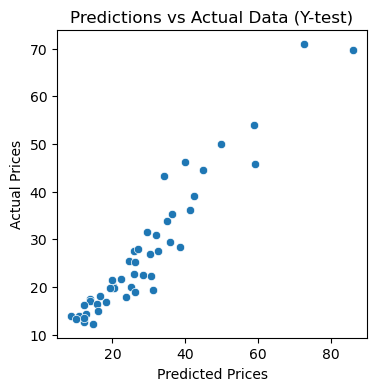

In [156]:
# creating a scatterplot to compare our predictions to the actual values (y_test)
plt.figure(figsize = (4,4))
sns.scatterplot(x = predictions, y = y_test)
plt.title('Predictions vs Actual Data (Y-test)')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')        

In [158]:
print('\n\n\nThe scatterplot depicts a very linear and positive-correlated scatterplot of predicted vs actual car prices\n\n\n')




The scatterplot depicts a very linear and positive-correlated scatterplot of predicted vs actual car prices





In [159]:
from sklearn import metrics
import math

In [160]:
# dealing with errors
mae = metrics.mean_absolute_error
mse = metrics.mean_squared_error

In [162]:
# printing the results 
print('the mean absolute error of my model is ', mae(y_test,predictions))
print('the mean squared error of my model is ', mse(y_test, predictions))
print('the root mean squared error of my model is ', math.sqrt(mse(y_test, predictions)))

the mean absolute error of my model is  3.7124730093346643
the mean squared error of my model is  27.0374974540955
the root mean squared error of my model is  5.1997593650182985


In [165]:
print('\n\n\nGiven that the actual values are on a scale of 10-70, a Mean Absolute Error (MAE) of 3.71 would generally be considered quite low. It suggests that, on average, the predicted values (price in thousands) are within about 3.71 units ($3,170.00)of the actual values, relative to a scale \n\n\n')





Given that the actual values are on a scale of 10-70, a Mean Absolute Error (MAE) of 3.71 would generally be considered quite low. It suggests that, on average, the predicted values (price in thousands) are within about 3.71 units ($3,170.00)of the actual values, relative to a scale 





In [166]:
# finding the residuals

In [167]:
# residuals = actual values - predictions
residuals = y_test - predictions

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_in_thousands', ylabel='Count'>

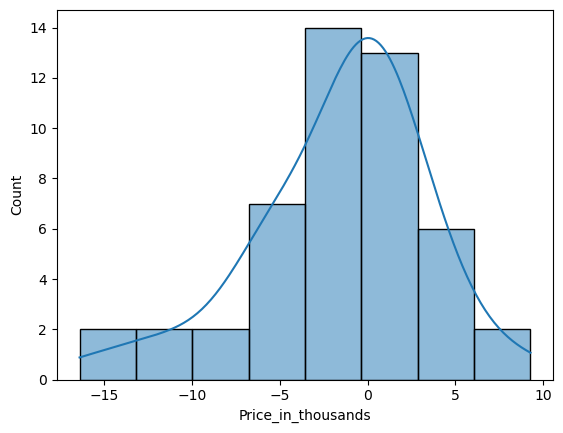

In [169]:
# plotting the residuals to find out if they are normally distributed
sns.histplot(residuals, kde = True)

In [172]:
print('\n\n\nThe residuals are slightly left-skewed, meaning that there is an excess of negative residuals, indicating that the model tends to underestimate the actual values more often.\n\n\n')





The residuals are slightly left-skewed, meaning that there is an excess of negative residuals, indicating that the model tends to underestimate the actual values more often.





In [175]:
# QQ plot visualization

In [174]:
import pylab
import scipy.stats as stats

[]

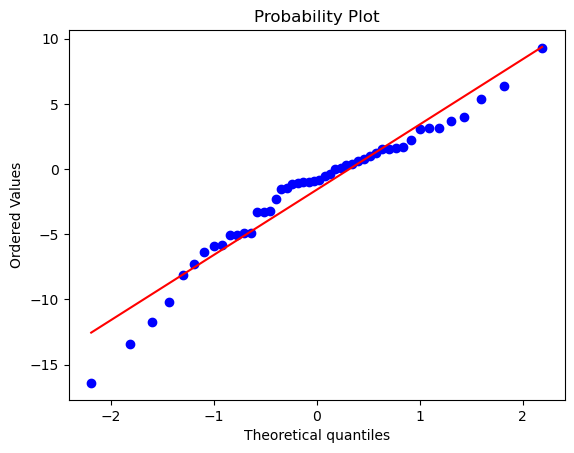

In [176]:
stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.plot()

In [181]:
print('\n\n\nThe blue points representing the ordered data values diverge substantially from the red reference line towards the left tail of the distribution. This pattern   indicates that the data distribution has much heavier tails than the normal distribution, meaning it has a higher frequency of extreme values to the left of the \'median\' than expected under normality.\n\n\n')
      




The blue points representing the ordered data values diverge substantially from the red reference line towards the left tail of the distribution. This pattern   indicates that the data distribution has much heavier tails than the normal distribution, meaning it has a higher frequency of extreme values to the left of the 'median' than expected under normality.





In [202]:
# LINEAR REGRESSION SCENARIO 3: predicting Fuel Efficiency based on Engine Size, Horsepower, Curb weight, Length, and Width of car

In [185]:
# comparing some of the independent variables with the dependent variable (fuel efficiency) using line plot

Text(33.51562500000001, 0.5, 'Fuel Efficiency')

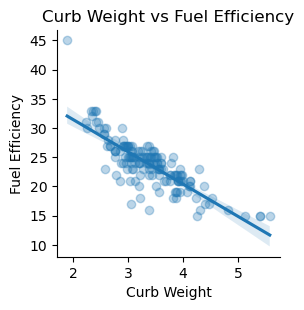

In [186]:
sns.lmplot(x = 'Curb_weight', y = 'Fuel_efficiency', data = cars, scatter_kws = {'alpha':0.3}, height = 3)
plt.title('Curb Weight vs Fuel Efficiency')
plt.xlabel('Curb Weight')
plt.ylabel('Fuel Efficiency')

In [188]:
print('\n\nStrong negative correlation between fuel efficiency and weight. As fuel efficiency goes increases, curb weight tends to decrease by quite a margin\n\n')



Strong negative correlation between fuel efficiency and weight. As fuel efficiency goes increases, curb weight tends to decrease by quite a margin




Text(33.51562500000001, 0.5, 'Fuel Efficiency')

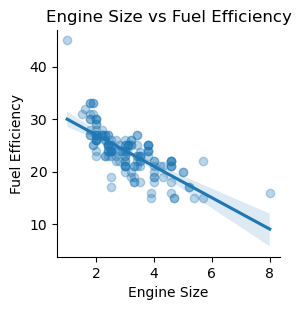

In [195]:
sns.lmplot(x = 'Engine_size', y = 'Fuel_efficiency', data = cars, scatter_kws = {'alpha':0.3}, height = 3)
plt.title('Engine Size vs Fuel Efficiency')
plt.xlabel('Engine Size')
plt.ylabel('Fuel Efficiency')

In [191]:
print('\n\nAnother srong negation correlation, not as steep as Curb Weight vs Fuel Efficiency but it is quite a steep, nonetheless\n\n')



Another srong negation correlation, not as steep as Curb Weight vs Fuel Efficiency but it is quite a steep, nonetheless




Text(33.51562500000001, 0.5, 'Fuel Effiency')

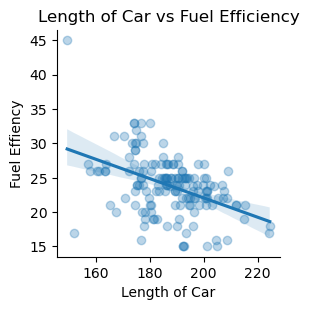

In [198]:
sns.lmplot(x = 'Length', y = 'Fuel_efficiency', data = cars, scatter_kws = {'alpha':0.3}, height = 3)
plt.title('Length of Car vs Fuel Efficiency')
plt.xlabel('Length of Car')
plt.ylabel('Fuel Effiency')

In [199]:
print('\n\nLength of Car vs Fuel Efficiency has the weakest negative correlation of the three variables I graphed\n\n')



Length of Car vs Fuel Efficiency has the weakest negative correlation of the three variables I graphed




In [200]:
from sklearn import model_selection

In [201]:
trainer = model_selection.train_test_split

In [204]:
# splitting the data
X = cars[['Horsepower', 'Engine_size', 'Curb_weight', 'Length', 'Width']]
y = cars['Fuel_efficiency']

In [205]:
X_train, X_test, y_train, y_test = trainer(X, y, test_size = 0.3, random_state = 555)

In [206]:
# showcasing training data
X_train

,Horsepower,Engine_size,Curb_weight,Length,Width
7,170.000000,2.500000,3.179000,176.00000,68.40
147,150.000000,1.800000,3.043000,184.10000,68.50
1,225.000000,3.200000,3.517000,192.90000,70.30
88,153.000000,3.000000,3.379000,199.70000,73.00
139,140.000000,1.800000,2.425000,170.50000,68.30
...,...,...,...,...,...
38,202.000000,2.700000,3.489000,203.70000,74.70
125,300.000000,3.400000,3.032000,174.50000,69.50
68,190.000000,4.000000,3.194000,167.50000,69.40
33,185.948718,3.060897,3.378026,187.34359,71.15


In [207]:
from sklearn import linear_model

In [208]:
# initialize linear regression model
lm = linear_model.LinearRegression()

In [209]:
# training the model
lm.fit(X_train, y_train)

LinearRegression()

In [210]:
# finding model intercept
lm.intercept_

24.91247461673413

In [211]:
# finding model R-Square
lm.score(X_train, y_train)

0.7320500110066079

In [216]:
print('\n\nBased on the R-Squared value, 73.21% of the variance in fuel efficiency can be attributed to our independent variables\' setup\n\n')



Based on the R-Squared value, 73.21% of the variance in fuel efficiency can be attributed to our independent variables' setup




In [214]:
# finding model coefficients
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Horsepower,0.000453
Engine_size,-1.456978
Curb_weight,-4.470920
Length,0.070257
Width,0.071792


In [217]:
print('\n\nBased on the coefficients\' dataframe, horsepower would be most correlated with fuel efficiency, and curb weight would be least correlated\n\n')



Based on the coefficients' dataframe, horsepower would be most correlated with fuel efficiency, and curb weight would be least correlated




In [219]:
# making predictions
predictions = lm.predict(X_test)
predictions

array([26.42650961, 28.53784095, 25.8390274 , 19.76786046, 16.84743471,
       21.64739699, 20.80022206, 22.8572828 , 24.24155964, 24.34235132,
       19.51911814, 24.9765681 , 23.74831559, 28.05606234, 27.34884815,
       21.60433912, 23.69562513, 23.39575224, 21.40123156, 22.68742117,
       20.39924439, 24.30828019, 28.21132093, 20.99094404, 20.67254825,
       29.99856364, 26.63956107, 21.78012693, 27.20844449, 22.79023631,
       22.73802448, 25.06664599, 11.47484655, 26.42420545, 26.49454698,
       24.36137775, 24.29036012, 26.0558907 , 20.32128649, 23.98926162,
       26.35380729, 27.0893298 , 16.88302335, 20.6579078 , 22.64782107,
       22.76085142, 23.19388397, 27.49842748])

Text(0, 0.5, 'Actual Efficiency')

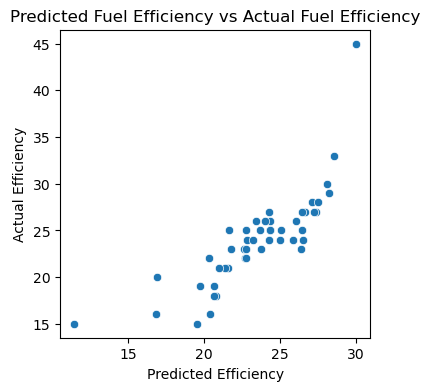

In [222]:
# using a scatterplot to draw a relationship between the predictions and the actual values (y_test_
plt.figure(figsize = (4,4))
sns.scatterplot(x = predictions, y = y_test)
plt.title('Predicted Fuel Efficiency vs Actual Fuel Efficiency')
plt.xlabel('Predicted Efficiency')
plt.ylabel('Actual Efficiency')

In [224]:
print('\n\nOverall, there is a positive linear relationship between predicted fuel efficiency and the actual fuel efficiency data. There are, however, two slighly major    outliers that could give the graph a curved shaped\n\n')
      



Overall, there is a positive linear relationship between predicted fuel efficiency and the actual fuel efficiency data. There are, however, two slighly major    outliers that could give the graph a curved shaped




In [225]:
# dealing with errors

In [226]:
from sklearn import metrics
import math

In [227]:
mae = metrics.mean_absolute_error
mse = metrics.mean_squared_error

In [228]:
print('the mean absolute error is ', mae(y_test, predictions))
print('the mean squared error is ', mse(y_test, predictions))
print('the root mean squared error is ',math.sqrt(mse(y_test, predictions)))

the mean absolute error is  1.7868145230950983
the mean squared error is  8.424245282341875
the root mean squared error is  2.9024550439829166


In [229]:
# finding the residuals

In [232]:
# residuals = actual data - predicted data
residuals = y_test - predictions
residuals.head(5)

81    -1.426510
136    4.462159
37    -1.839027
69    -0.767860
54    -0.847435
Name: Fuel_efficiency, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Residuals')

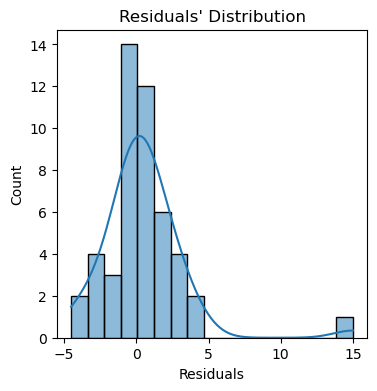

In [236]:
# using a histogram to display whether the residuals are normally distributed
plt.figure(figsize = (4,4))
sns.histplot(residuals, kde = True)
plt.title('Residuals\' Distribution')
plt.xlabel('Residuals')

In [237]:
print('\n\nThe residuals are very right-skewed because of an outlier value of 15\n\n')



The residuals are very right-skewed because of an outlier value of 15




In [238]:
# Making a QQ-plot visualization

In [239]:
import pylab
import scipy.stats as stats

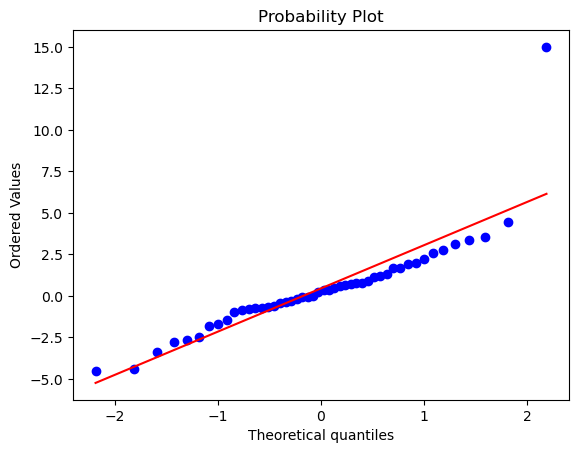

In [240]:
stats.probplot(residuals, dist = 'norm', plot = pylab)
pylab.show()

In [246]:
print('\n\nThe blue points, representing the ordered data values, align very closely with the red reference line across the entire range of the distribution. This          near-perfect linearity suggests that the data distribution is highly consistent with the normal distribution.\
There are no significant deviations from the         reference line, indicating that the data does not exhibit heavy tails or any other departures from normality, such as skewness\n\n')




The blue points, representing the ordered data values, align very closely with the red reference line across the entire range of the distribution. This          near-perfect linearity suggests that the data distribution is highly consistent with the normal distribution.There are no significant deviations from the         reference line, indicating that the data does not exhibit heavy tails or any other departures from normality, such as skewness




In [247]:
# LINEAR REGRESSION SCENARIO 4: predicting re-sale value of a car based on its price, engine size, horse power, fuel efficiency, and curb weight

In [248]:
# using line plots to compare the independent variables to my y (dependent variable - 'Resale_value')

Text(33.51562500000001, 0.5, 'Re-sale Value')

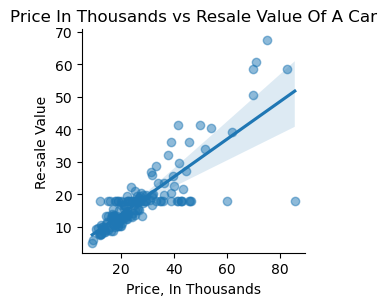

In [250]:
sns.lmplot(x = 'Price_in_thousands', y = 'Resale_value', data = cars, scatter_kws = {'alpha':0.5}, height = 3)
plt.title('Price In Thousands vs Resale Value Of A Car')
plt.xlabel('Price, In Thousands')
plt.ylabel('Re-sale Value')

In [251]:
print('\n\nThe appears to be a positive correlation between Price and Re-sale value, with the graph yielding more outlier past x=40,y=30\n\n')



The appears to be a positive correlation between Price and Re-sale value, with the graph yielding more outlier past x=40,y=30




Text(33.51562500000001, 0.5, 'Re-Sale Value')

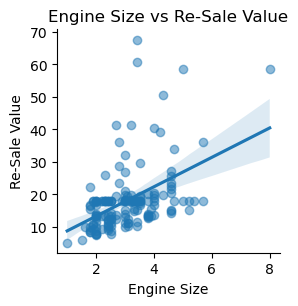

In [252]:
sns.lmplot(x = 'Engine_size', y = 'Resale_value', data = cars, scatter_kws = {'alpha':0.5}, height = 3)
plt.title('Engine Size vs Re-Sale Value')
plt.xlabel('Engine Size')
plt.ylabel('Re-Sale Value')

In [254]:
print('\n\nThis graph also depits a positive correlation between x and y variables but with more outliers, it seems\n\n')



This graph also depits a positive correlation between x and y variables but with more outliers, it seems




Text(33.51562500000001, 0.5, 'Re-sale Value')

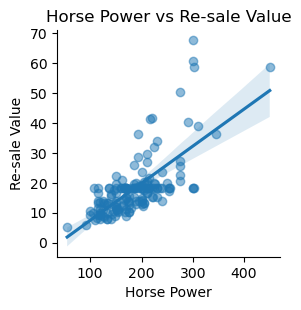

In [257]:
sns.lmplot(x = 'Horsepower', y = 'Resale_value', data = cars, scatter_kws = {'alpha':0.5}, height = 3)
plt.title('Horse Power vs Re-sale Value')
plt.xlabel('Horse Power')
plt.ylabel('Re-sale Value')

In [258]:
print('\n\nAgain, there is a positive correlation with arguaby less outliers compared to using horse power or engine size variables\n\n')



Again, there is a positive correlation with arguaby less outliers compared to using horse power or engine size variables




Text(33.51562500000001, 0.5, 'Re-sale Value')

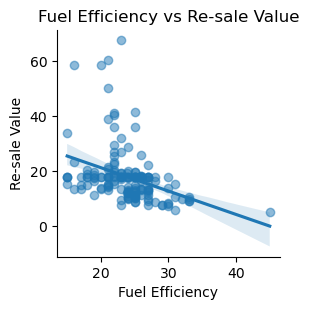

In [259]:
sns.lmplot(x = 'Fuel_efficiency', y = 'Resale_value', data = cars, scatter_kws = {'alpha':0.5}, height = 3)
plt.title('Fuel Efficiency vs Re-sale Value')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Re-sale Value')

In [260]:
print('\n\nSurprisingly, according to the data, as fuel efficiency goes up, the re-sale value of the car decreases. One explanation for this could be that about half of the points on the graphs are outlier, thus, leading to a misleading graph\n\n')



Surprisingly, according to the data, as fuel efficiency goes up, the re-sale value of the car decreases. One explanation for this could be that about half of the points on the graphs are outlier, thus, leading to a misleading graph




In [261]:
from sklearn import model_selection

In [262]:
trainer = model_selection.train_test_split

In [264]:
# splitting the data into X and y
X = cars[['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_efficiency', 'Curb_weight']]
y = cars['Resale_value']

In [265]:
X_train, X_test, y_train, y_test = trainer(X, y, test_size = 0.3, random_state = 444)

In [266]:
# checking the X_train data
X_train

,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Curb_weight
63,11.799,2.0,140.0,27.0,2.626
96,38.900,2.3,190.0,26.0,3.055
101,13.499,1.8,126.0,30.0,2.593
61,26.000,3.5,210.0,23.0,4.288
111,36.229,4.0,250.0,22.0,3.967
...,...,...,...,...,...
67,14.460,2.5,120.0,17.0,3.045
8,33.400,2.8,193.0,24.0,3.197
23,24.340,3.8,200.0,25.0,3.500
112,31.598,4.3,190.0,19.0,4.068


In [267]:
from sklearn import linear_model

In [268]:
# initializing linear_model
lm = linear_model.LinearRegression()

In [269]:
# training the model
lm.fit(X_train, y_train)

LinearRegression()

In [270]:
# finding the model intercept
lm.intercept_

19.25419994238629

In [272]:
# finding the model R-Squared
lm.score(X_train, y_train)

0.6629165418485785

In [274]:
print('\n\nThe R-Squared of this model is slightly lower than that of the previous linear regression models in this project. One can partially attribute it to the data      having more outliers when trying to predict Re-Sale value\n\n') 
      



The R-Squared of this model is slightly lower than that of the previous linear regression models in this project. One can partially attribute it to the data      having more outliers when trying to predict Re-Sale value




In [276]:
# finding model coefficients
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Cofficients'])
cdf

,Cofficients
Price_in_thousands,0.556356
Engine_size,-1.648407
Horsepower,0.028352
Fuel_efficiency,-0.271115
Curb_weight,-3.061820


In [277]:
print('\n\nThe coefficients would suggest that the price of a car is most correlated to its re-sale value compared to the other independent variables. Curb weight has the  least correlation with re-sale value\n\n') 
      



The coefficients would suggest that the price of a car is most correlated to its re-sale value compared to the other independent variables. Curb weight has the least correlation with re-sale value




In [278]:
# making predictions

In [279]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Actual')

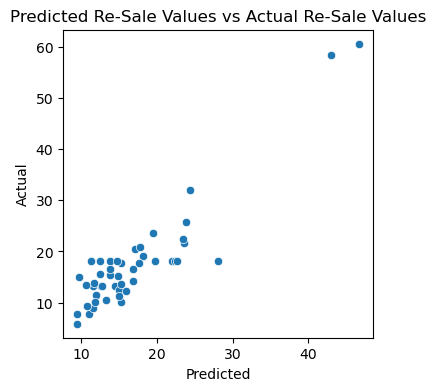

In [282]:
# making a scatterplot to compare the model's predictions with the actual data (y_test_
plt.figure(figsize = (4,4))
sns.scatterplot(x = predictions, y = y_test)
plt.title('Predicted Re-Sale Values vs Actual Re-Sale Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [283]:
print('\n\nThe relationship between the predicted and actual re-sale prices is fairly linear with a few outliers\n\n')



The relationship between the predicted and actual re-sale prices is fairly linear with a few outliers




In [284]:
# dealing with errors

In [285]:
from sklearn import metrics
import math

In [286]:
mae = metrics.mean_absolute_error
mse = metrics.mean_squared_error

In [287]:
print('the mean absolute error is ', mae(y_test, predictions))
print('the mean squared error is ', mse(y_test, predictions))
print('the root mean squared error is ',math.sqrt(mse(y_test, predictions)))

the mean absolute error is  3.3789356519297584
the mean squared error is  20.80278585284699
the root mean squared error is  4.561007109493143


In [288]:
# finding the residuals

In [290]:
# residuals = actual values - predicted values
residuals = y_test - predictions

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Resale Value Residuals')

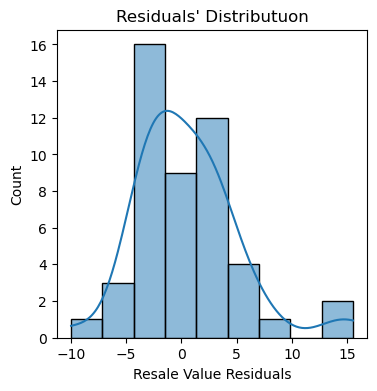

In [293]:
# plotting the residuals on a histogram to determine if the values are normally distributed
plt.figure(figsize = (4,4))
sns.histplot(residuals, kde = True)
plt.title('Residuals\' Distributuon')
plt.xlabel('Resale Value Residuals')

In [294]:
# QQ-Plot Visualization

In [295]:
import pylab
import scipy.stats as stats

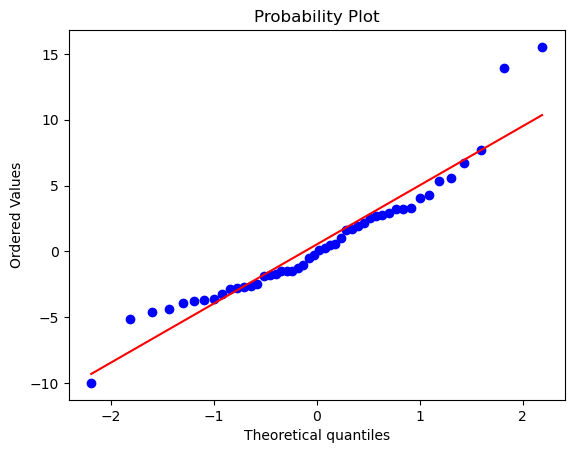

In [296]:
stats.probplot(residuals, dist = 'norm', plot = pylab)
pylab.show()

In [297]:
print('\n\n The QQ plot shows an subtle S-shaped pattern, indicating that the data distribution is skewed and has heavier tails than the theoretical normal distribution\n\n')
      



 The QQ plot shows an subtle S-shaped pattern, indicating that the data distribution is skewed and has heavier tails than the theoretical normal distribution




In [299]:
# EXPLORATORY DATA ANALYSIS IN MYSQL FILE